- Web Scraping and HTML Parsing

- Regex & python string functions

- Exception Handeling

- File Operations

- Processing dataframes (pandas) and playing with dataframe

- Sentiment Analysis finally (Using textblob library)

- Some interesting plots

- Taken a small dataset so that everything can be transparent and it would be easy to follow

- Experiment what data science cant solve for us and what it can be effective for

The reference for web scraping was from following site:
    https://www.nicholasrenotte.com/how-to-build-a-sentiment-analyser-for-yelp-reviews-in-python/

In [1]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen  #urlopen is a function

In [2]:
#Opening up connection and grabbing the content
url = 'https://foursquare.com/explore?mode=url&near=Helsinki&nearGeoId=72057594038586161&q=Ice%20cream'
req = urlopen(url)
site = req.read()
req.close()

In [3]:
#HTML parsing
page_bs = bs(site, "html.parser")

Lets play around

In [4]:
# page_bs.h1

In [5]:
# page_bs.p

In [6]:
# page_bs.body.span

Now lets grab each product

In [7]:
contentHolder = page_bs.findAll("div",{"class":"contentHolder"})

In [8]:
#type(contentHolder)

In [9]:
#len(contentHolder)

In [10]:
#content = contentHolder[0]

In [11]:
#type(content)

In [12]:
#content.a #Is actually the title of each div 

In [13]:
#content.a.text #Lets get the text only and remove all unnecessary tags

That was the title now lets get some more stuffs

In [14]:
#content.find("p",{"class":"tipText"}).text

In [15]:
# import re
# content.find("div", {"class":re.compile(r'venueScore')}).text

In [46]:
#Now lets loop through the ResultSet objects
import re

filename = "Icecream.csv"
#Had to do some searches and find out about encoding. Try without errors = ignore and what happens
#https://en.wikipedia.org/wiki/ISO/IEC_8859-1
f = open(filename,"w", encoding = 'ISO 8859-1', errors = 'ignore') #The filename is already given, which is open here now
headers = ("Title ,Reviews, Ratings\n")   #Headers or column names
f.write(headers)

for elements in contentHolder: 
    title = elements.a.text
    ratings = elements.find("div",{"class":re.compile(r'venueScore')}).text   # venueScore have additional words with it like positive, neutral and negative
    ratings = ratings.replace('?','') #We do this so as to find out the NaNs easily
    
    
    while True:
        reviews = elements.find("p",{"class":"tipText"})  
        if reviews is not None:
            review = reviews.text
        else:
            review = '--'
        break
    review = review.replace('•','')  #This character wont be decoded properly
    review = review.replace(',','')  #The extra commas in review will create problem while creating csv file, as there are only 3 commas in our csv file
    #Lets also remove the name and date as we dont need them
    cur = review.find('20')  #Will work for now
    review = review[cur+4:]  #is creating load for the compiler though....we can think of other options as well

    #reviews = elements.find("p",{"class":"tipText"}).text
    print("Title: " + title)     #I am printing to see what is really happening
    print("Reviews: "+ review)
    print("Ratings: "+ ratings)
    
    f.write(title+","+review+","+ratings +"\n")
    
f.close()
    
    

Title: Jädelino
Reviews: Chili chocolate flavour to burn you and matcha tea flavour to extinguish you? Yes please! The best ice cream in town!
Ratings: 9.3
Title: Bus Gelato
Reviews: Great Service good coffee and excellent artesan icecream
Ratings: 8.8
Title: Helsingin jäätelötehdas
Reviews: One of my "must go" places in summer! I've tried every single ice cream they have and love them all. Try it! :)
Ratings: 8.0
Title: Helsingin Jäätelötehdas
Reviews: Great ice cream. Comes at a price though
Ratings: 7.9
Title: Helsingin jäätelötehtaan kioski
Reviews: Best ice cream by the biggest scoops I've tried in this town!
Ratings: 7.8
Title: Fazer Café
Reviews: I have been coming here for many years great coffee food and ice cream.
Ratings: 8.0
Title: Käpylän Lippakioski
Reviews: Good coffee brilliant ice-cream nice hippie-like atmosphere:)!
Ratings: 7.8
Title: Magnum Helsinki
Reviews: Excellent Ice Cream with a speciaö twist
Ratings: 7.5
Title: Café Vanille
Reviews: Cute kind of authentic pla

This is how people scrap data from various websites and use it for their personal purposes

Now lets load the file that we saved and do some stuffs from it

In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv(r"Icecream.csv", header = 0, encoding = 'ISO 8859-1',sep=r'\s*,\s*') #Try without sep and see what happens

C:\Users\tranq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [19]:
df.head()

,Title,Reviews,Ratings
0,Jädelino,Chili chocolate flavour to burn you and matcha...,9.3
1,Bus Gelato,Great Service good coffee and excellent artesa...,8.8
2,Helsingin jäätelötehdas,"One of my ""must go"" places in summer! I've tri...",8.0
3,Helsingin Jäätelötehdas,Great ice cream. Comes at a price though,7.9
4,Helsingin jäätelötehtaan kioski,Best ice cream by the biggest scoops I've trie...,7.8


In [20]:
df.isnull().sum()

Title      0
Reviews    3
Ratings    8
dtype: int64

In [21]:
len(df)

30

In [22]:
df.dropna(inplace = True)

In [23]:
len(df)

22

In [24]:
# df['Reviews'] = df['Reviews'].apply(lambda x:x[x.find('20')+4:])

# Had we not done it above, we could have done it here too

In [25]:
df.head()

,Title,Reviews,Ratings
0,Jädelino,Chili chocolate flavour to burn you and matcha...,9.3
1,Bus Gelato,Great Service good coffee and excellent artesa...,8.8
2,Helsingin jäätelötehdas,"One of my ""must go"" places in summer! I've tri...",8.0
3,Helsingin Jäätelötehdas,Great ice cream. Comes at a price though,7.9
4,Helsingin jäätelötehtaan kioski,Best ice cream by the biggest scoops I've trie...,7.8


In [26]:
%matplotlib inline

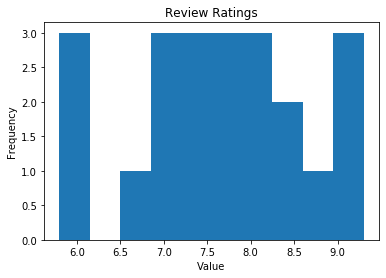

In [27]:
import matplotlib.pyplot as plt
from numpy.random import normal
plt.hist(df['Ratings'])
plt.title("Review Ratings")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

We can see there are no negative reviews at all

#### Clean up our data

In [28]:
# #We can use our own stopwords like this, but since NLTK does that and since we will need NLTK for some other purposes too, we import stopwords from NLTK
# stopwords = ['a','an','and','the','of','this','that','which','in','is']

In [29]:
df['review_lowercase'] = df['Reviews'].apply(lambda x:" ".join(word.lower() for word in x.split()))

In [30]:
df['review_nopunct'] = df['review_lowercase'].str.replace('[^\w\s]','') #Removes non words and letters

Why do you think such steps are even necessary ?

In [31]:
df.head()

,Title,Reviews,Ratings,review_lowercase,review_nopunct
0,Jädelino,Chili chocolate flavour to burn you and matcha...,9.3,chili chocolate flavour to burn you and matcha...,chili chocolate flavour to burn you and matcha...
1,Bus Gelato,Great Service good coffee and excellent artesa...,8.8,great service good coffee and excellent artesa...,great service good coffee and excellent artesa...
2,Helsingin jäätelötehdas,"One of my ""must go"" places in summer! I've tri...",8.0,"one of my ""must go"" places in summer! i've tri...",one of my must go places in summer ive tried e...
3,Helsingin Jäätelötehdas,Great ice cream. Comes at a price though,7.9,great ice cream. comes at a price though,great ice cream comes at a price though
4,Helsingin jäätelötehtaan kioski,Best ice cream by the biggest scoops I've trie...,7.8,best ice cream by the biggest scoops i've trie...,best ice cream by the biggest scoops ive tried...


In [32]:
df.columns

Index(['Title', 'Reviews', 'Ratings', 'review_lowercase', 'review_nopunct'], dtype='object')

Let's take one row for example to see what is happening

In [33]:
df.loc[df['Title']=='Kahvila Sävy'] # Without using sep=r'\s*,\s*' in the read_csv() , I got keyerror Title. Can you think why it happened and why this solved the issue

,Title,Reviews,Ratings,review_lowercase,review_nopunct
18,Kahvila Sävy,"Try the new ""Twitter McFlurry"" #delicious #dou...",9.1,"try the new ""twitter mcflurry"" #delicious #dou...",try the new twitter mcflurry delicious doubles...


In [34]:
from nltk.corpus import stopwords

In [35]:
stop_words = stopwords.words('english')

In [36]:
df['review_nostopword'] = df['review_nopunct'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [37]:
df.head()

,Title,Reviews,Ratings,review_lowercase,review_nopunct,review_nostopword
0,Jädelino,Chili chocolate flavour to burn you and matcha...,9.3,chili chocolate flavour to burn you and matcha...,chili chocolate flavour to burn you and matcha...,chili chocolate flavour burn matcha tea flavou...
1,Bus Gelato,Great Service good coffee and excellent artesa...,8.8,great service good coffee and excellent artesa...,great service good coffee and excellent artesa...,great service good coffee excellent artesan ic...
2,Helsingin jäätelötehdas,"One of my ""must go"" places in summer! I've tri...",8.0,"one of my ""must go"" places in summer! i've tri...",one of my must go places in summer ive tried e...,one must go places summer ive tried every sing...
3,Helsingin Jäätelötehdas,Great ice cream. Comes at a price though,7.9,great ice cream. comes at a price though,great ice cream comes at a price though,great ice cream comes price though
4,Helsingin jäätelötehtaan kioski,Best ice cream by the biggest scoops I've trie...,7.8,best ice cream by the biggest scoops i've trie...,best ice cream by the biggest scoops ive tried...,best ice cream biggest scoops ive tried town


#### Wordcloud
Word cloud or tag cloud is a visual representation of text data. Notice the different color and size of fonts. 

So what's the intuition behind wordcloud then?

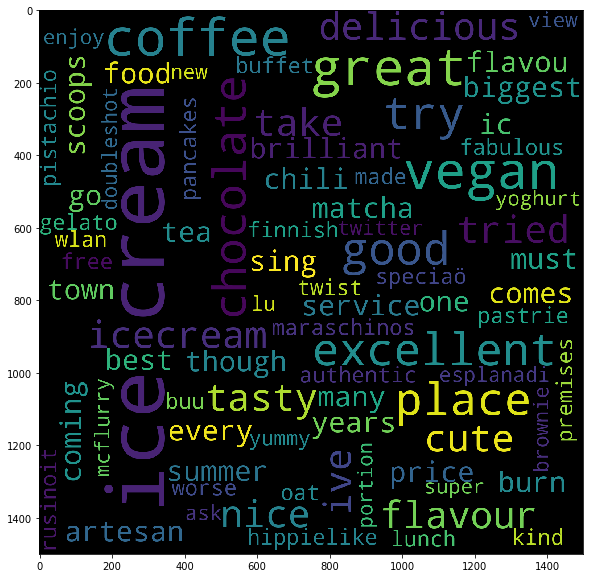

In [38]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1500, height = 1500).generate(df['review_nostopword'].to_string())

plt.figure (figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
#plt.axis("off")

In [39]:
#Pandas series has funtion value_counts() which will give us with the number of occurence of each words
pd.Series(" ".join(df['review_nostopword']).split()).value_counts()[:30]

cream         16
ice           16
coffee         5
vegan          4
try            4
great          4
chocolate      3
good           3
icecream       3
excellent      3
take           2
best           2
nice           2
cute           2
ive            2
free           2
delicious      2
tasty          2
yummy          2
service        2
town           2
lunch          2
place          2
tried          2
flavour        2
mcflurry       1
burn           1
atmosphere     1
portion        1
hippielike     1
dtype: int64

In [40]:
other_stopwords = ['ice','cream','ive','take','tried','try']


In [41]:

df['review_cleaned'] = df['review_nostopword'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stopwords))

In [42]:
df.head()

,Title,Reviews,Ratings,review_lowercase,review_nopunct,review_nostopword,review_cleaned
0,Jädelino,Chili chocolate flavour to burn you and matcha...,9.3,chili chocolate flavour to burn you and matcha...,chili chocolate flavour to burn you and matcha...,chili chocolate flavour burn matcha tea flavou...,chili chocolate flavour burn matcha tea flavou...
1,Bus Gelato,Great Service good coffee and excellent artesa...,8.8,great service good coffee and excellent artesa...,great service good coffee and excellent artesa...,great service good coffee excellent artesan ic...,great service good coffee excellent artesan ic...
2,Helsingin jäätelötehdas,"One of my ""must go"" places in summer! I've tri...",8.0,"one of my ""must go"" places in summer! i've tri...",one of my must go places in summer ive tried e...,one must go places summer ive tried every sing...,one must go places summer every single love
3,Helsingin Jäätelötehdas,Great ice cream. Comes at a price though,7.9,great ice cream. comes at a price though,great ice cream comes at a price though,great ice cream comes price though,great comes price though
4,Helsingin jäätelötehtaan kioski,Best ice cream by the biggest scoops I've trie...,7.8,best ice cream by the biggest scoops i've trie...,best ice cream by the biggest scoops ive tried...,best ice cream biggest scoops ive tried town,best biggest scoops town


Now lets see the cleaned review in wordcloud 

In [43]:
import numpy as np
from PIL import Image
icecream_mask = np.array(Image.open('icecream2.jpg'))
#icecream_mask  ##This image would be displayed as matrix of pixels [R,G,B]

FileNotFoundError: [Errno 2] No such file or directory: 'icecream2.jpg'

Computers understand numbers as an array of RGB pixels 

In [ ]:
#Height and width parameters wont make sense here
wordcloud = WordCloud(background_color='white', mask = icecream_mask, contour_width=3, contour_color='violet').generate(df['review_cleaned'].to_string())

In [ ]:
plt.figure (figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

plt.show()

We can do spelling correction, lemmatization, sentiment analysis, summarazing texts, translation & language detection, text classifications and several other interesting stuffs using textblob library.

#### Lemmatization:
According to Wikipedia:

Lemmatisation in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

In [ ]:
#Now Lemmatization
from textblob import Word
df['review_lemmatized'] = df['review_cleaned'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
#Stuck with syntax ? See the PythonBasics 

So what could be the advantage of lemmitisation for text processing tasks ?

In [ ]:
from textblob import TextBlob
#Calculate sentiment on whole review
#df['lemmatized'].apply(lambda x: TextBlob(x).sentiment) #Gives us with tuple of polarity and subjectivity

df['polarity'], df['subjectivity'] = df['review_lemmatized'].apply(lambda x: TextBlob(x).sentiment[0]), df['review_lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])
df.head()

The sentiment function of textblob returns two properties, polarity, and subjectivity. We can see that for 'Bus Gelato', polarity is 0.833, which means that the statement is positive and 0.7833 subjectivity refers that mostly it is a public opinion and not a factual information.

In [ ]:
#Lets drop the unwanted columns
df.drop(['review_lowercase','review_nopunct','review_nostopword','review_lemmatized'], axis = 1, inplace = True)
df.head()

Why even there are negative polarity? From the histogram of the ratings above, we see there are either neutral or positive reviews only

In [ ]:
df

Let's try language detection using textblob and translate the review and then try again

No. Not even google can detect! So no luck this time ;)

So I will rely on ratings alone then

Now the question is would you rely on textblob?


In [ ]:
blob = TextBlob('maraschinos rusinoit buu')

In [ ]:
blob.detect_language()

In [ ]:
# #No luck
# blob.translate(from_lang= 'ro', to ='en')  #Shows error :(

In [ ]:
# #Let's try this
# blob.translate(to ='en') #Not even now

In [ ]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['review_cleaned']:   #This is a dataframe with review_cleaned column only
        for sentence in data[col].iteritems():     #This is now a generator of tuples. The second parameter has sentences. what is the first one ?
            word_list = sentence[1].split()        #Split the sentences in a comma separated words within a list. lots of demos in python practice
            corpus.append(word_list)               #Now we make a full corpus combining all the wordlists or the documents
            
    return corpus

corpus = build_corpus(df)        
corpus[0:5]

What pop corn is being popped ?

Let me think in detail

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iteritems.html
#type(df['review_cleaned'])
# sen = df['review_cleaned'].iteritems()
# next(sen)


In [ ]:
#sum (len(list) for list in corpus)


From above function it is obvious that corpus is a collection of text documents. (Try len (corpus). What is the result ?)
Each processed review is inserted in a list now, which is a document. So corpus is a collection of documents

In [ ]:
from gensim.models import word2vec
model = word2vec.Word2Vec(corpus, size=32, window=20, min_count=1) # Adjust min_count if you get error. 1 being the minimum
model.wv['service']  #Lets see the word vector service trained in our model.wv (Is a numpy vector of a word)

Without understanding the details of neural nets, we still use it for our advantage. The input to this neural net: word2vec is a text corpus and the output is a set of (feature) vectors.These vectors are used to perform operations on the vectors such as vector lookup, distance, similarity etc. (We are going to see one magic that can be done because of these word vectors by using TSNE)

In [ ]:
from sklearn.manifold import TSNE
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []   #90 words corresponding to their tokens. Why 90 ? There were 120 words in corpus, we found above. 
    tokens = []   #Each token of length 32 as we defined above

    '''The vocabulary is in the vocab field of the Word2Vec model's wv property, as a dictionary, with 
    the keys being each token (word).'''
    for word in model.wv.vocab:  #model.wv is the mapping between word and vectors (keyed vector) we discussed in above cell also
        tokens.append(model[word])   #This is array of the features of the word
        labels.append(word)   #And this is list of course
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state = 0) #Try varying n_iter & perplexity
    new_values = tsne_model.fit_transform(tokens)  # 90

    x = []   #Are these the x and y coordinates ?
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12, 12))   #Make figure little bigger ?
    for i in range(len(x)):
        plt.scatter(x[i],y[i])    #This will give scatter plot between x and y
        plt.annotate(labels[i],     #Too many parameters. Lets just check the documentation of matplotlib.pyplot.annotate
                     xy=(x[i], y[i]),
                     xytext=(5, 5),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    
#     print (len(tokens))  #This is how i found there are 90 tokens ;)
    #print(type(labels))

    plt.show()

In [ ]:
tsne_plot(model)

In [ ]:
# flattened_corpus = [item for sublist in corpus for item in sublist]
# len(set(flattened_corpus))  #So, yes, there are 90 labels

In [ ]:
# x =  [1,2,1.5,2.3,1.7]
# y = [-4,-3,-4.5,-3.3,-4.9]
# labels = ['a','b','c','d','e']

# plt.figure(figsize=(6, 6))   #Make figure little bigger ?
# for i in range(len(x)):
#     plt.scatter(x[i],y[i])    #This will give scatter plot between x and y
#     plt.annotate(labels[i],
#                  xy=(x[i], y[i]),     #Too many parameters. Lets just check the documentation of matplotlib.pyplot.annotate
#                   ha='right',
#                  va='bottom')
# plt.show;

Now the question is what is TSNE ?

Did we represent each word (that had so much features) as a point and did we show the relationship with other words ??

But i dont get sense out of this graph. This was just a toy example. We can't keep playing with toys. Let's go to bigger project next so that we can make sense of this T-SNE stuff 

Feeling dizzy now 😵. 

Take a break. Get a cup of chocolate or an icecream and see it again

Wow! It isnt that difficult now

Did we perform manual parameter tuning somewhere ?

And what is PCA now ? [Hint: Dimensionality Reduction]

In [ ]:
model.most_similar('yoghurt')[:5]

In [ ]:
#Some boring stats
df.describe()

No, I don't like statistics. 

But wait - I can see statistics can play magics! (Look at the table again)

In [ ]:
col1 = round(df['polarity']*10,2)
col2 = df['Ratings']
col1

In [ ]:
plt.scatter(col1, col2)
plt.show() # Depending on whether you use IPython or interactive mode, etc.

See the correlation plot. A high correlation plot would have been a rather slopy straight line like [href]. So in our next project, we work with massive data and do some more interesting data science stuffs ;)

##### This was just a warmup session. Our project will be on tripadvisor site. I am planning to have several categories of data, so by the end of week get scraped all the data I need. So that concepts like correlation, heatmaps graphical for unsupervised learning (Display in graph several categories). With a lot of data, our analysis would be meaningful. 